# G_1. Tuning parameters of GB (SMOTE)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#load the files

X_train = pd.read_csv('../data/x_y_data/re_smote/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/re_smote/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/re_smote/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/re_smote/y_test.csv')
#data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

y_train.loc[y_train['churn'] == 'Yes', 'churn'] = 1
y_train.loc[y_train['churn'] == 'No', 'churn'] = 0

y_train['churn'] =y_train['churn'].astype('int64')


y_test.loc[y_test['churn'] == 'Yes', 'churn'] = 1
y_test.loc[y_test['churn'] == 'No', 'churn'] = 0

y_test['churn'] =y_test['churn'].astype('int64')


In [3]:
#set the high-parameter

param_grid = {
    'loss': ['log_loss', 'exponential'],
    'n_estimators': [75, 100, 125,150],
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 3, 5],
    'max_depth':[5,10,15],
    'max_features': ['sqrt'] # round(sqrt(#cols))
    }
kappa_scorer = make_scorer(cohen_kappa_score)
gb = GradientBoostingClassifier(random_state=12345)

# make_scorer(error_metric_kappa)
grid_search = GridSearchCV(gb, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 20,  scoring=kappa_scorer)
grid_search.fit(X_train,y_train)
grid_search.best_params_ #To check the best set of parameters returned

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.807, test=0.494) total time=   2.8s
[CV 4/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.747, test=0.786) total time=   3.1s
[CV 2/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 2/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.751, test=0.592) total time=   2.2s
[CV 3/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.752, test=0.743) total time=   3.2s
[CV 5/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.778, test=0.608) total time=   2.8s
[CV 5/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.745, test=0.785) total time=   3.1s
[CV 3/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 3/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.735, test=0.730) total time=   2.8s
[CV 1/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 1/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.826, test=0.488) total time=   3.8s
[CV 4/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 4/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 5/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.709, test=0.745) total time=   2.2s
[CV 5/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.732, test=0.768) total time=   2.5s
[CV 3/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.715, test=0.708) total time=   2.2s
[CV 4/5; 2/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 2/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.724, test=0.754) total time=   2.5s
[CV 2/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.773, test=0.506) total time=   2.2s
[CV 2/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.793, test=0.602) total time=   3.2s
[CV 1/5; 5/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 1/5; 5/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=7

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 1/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 4/5; 1/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.707, test=0.731) total time=   2.2s
[CV 1/5; 3/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 3/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.815, test=0.492) total time=   3.2s
[CV 4/5; 4/288] START criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 4/5; 4/288] END criterion=friedman_mse, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 70/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.990, test=0.603) total time=  15.5s
[CV 5/5; 71/288] START criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125
[CV 5/5; 71/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.991, test=0.816) total time=  18.2s
[CV 5/5; 73/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 5/5; 73/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.697, test=0.749) total time=   2.2s
[CV 3/5; 74/288] START criterion=friedman_mse, loss=exponential, max_depth=5, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 5/5; 70/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.985, test=0.817) total time=  16.0s
[CV 3/5; 72/288] START criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150
[CV 3/5; 72/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=(train=0.994, test=0.778) total time=  22.9s
[CV 3/5; 76/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 3/5; 76/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.755, test=0.748) total time=   4.3s
[CV 5/5; 77/288] START criterion=friedman_mse, loss=exponential, max_depth=5, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 72/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=(train=0.996, test=0.591) total time=  22.9s
[CV 5/5; 75/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 5/5; 75/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.738, test=0.791) total time=   3.8s
[CV 1/5; 77/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 1/5; 77/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75;, score=(train=0.766, test=0.518) total time=   2.1s
[CV 4/5; 77/288] START criterion=friedman_mse, loss=exponential, max_depth=5

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 4/5; 69/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=75;, score=(train=0.976, test=0.809) total time=  11.2s
[CV 2/5; 71/288] START criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125
[CV 2/5; 71/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.995, test=0.599) total time=  20.1s
[CV 5/5; 72/288] START criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150
[CV 5/5; 72/288] END criterion=friedman_mse, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=(train=0.994, test=0.824) total time=  22.9s
[CV 1/5; 79/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_f

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 73/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.766, test=0.511) total time=   2.0s
[CV 2/5; 73/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 73/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.749, test=0.591) total time=   1.9s
[CV 3/5; 73/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 3/5; 73/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=0.698, test=0.688) total time=   2.3s
[CV 1/5; 74/288] START criterion=friedman_mse, loss=exponential, max_depth=5,

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 75/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.745, test=0.781) total time=   3.7s
[CV 5/5; 76/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 5/5; 76/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.752, test=0.795) total time=   4.2s
[CV 5/5; 78/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100
[CV 5/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.721, test=0.757) total time=   2.7s
[CV 3/5; 80/288] START criterion=friedman_mse, loss=exponential, max_dep

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 81/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=75;, score=(train=0.739, test=0.592) total time=   2.0s
[CV 3/5; 82/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 3/5; 82/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.723, test=0.713) total time=   3.1s
[CV 1/5; 84/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150
[CV 1/5; 84/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.817, test=0.490) total time=   4.6s
[CV 5/5; 85/288] START criterion=friedman_mse, loss=exponential, max_dept

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5; 78/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.715, test=0.747) total time=   2.8s
[CV 2/5; 80/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 2/5; 80/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.801, test=0.604) total time=   4.1s
[CV 5/5; 81/288] START criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=75
[CV 5/5; 81/288] END criterion=friedman_mse, loss=exponential, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=75;, score=(train=0.692, test=0.732) total time=   2.5s
[CV 3/5; 83/288] START criterion=friedman_mse, loss=exponential, max_depth

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 140/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=150;, score=(train=0.994, test=0.778) total time=  19.9s
[CV 2/5; 142/288] START criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 2/5; 142/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.990, test=0.610) total time=  13.2s
[CV 5/5; 143/288] START criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125
[CV 5/5; 143/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.990, test=0.810) total time=  15.8s
[CV 5/5; 145/288] START criterion=squared_error, loss=log_loss

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 139/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=125;, score=(train=0.992, test=0.780) total time=  16.2s
[CV 1/5; 141/288] START criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=75
[CV 1/5; 141/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=75;, score=(train=0.983, test=0.535) total time=  10.5s
[CV 1/5; 142/288] START criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100
[CV 1/5; 142/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=100;, score=(train=0.989, test=0.519) total time=  13.1s
[CV 4/5; 143/288] START criterion=friedman_mse, loss=exponential

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 146/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.807, test=0.494) total time=   2.5s
[CV 4/5; 146/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 146/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=0.724, test=0.755) total time=   2.7s
[CV 4/5; 147/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 4/5; 147/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.748, test=0.769) total time=   3.1s
[CV 5/5; 148/288] START criterion=squared_error, loss=log_loss, max_depth=5, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 1/5; 147/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=0.815, test=0.492) total time=   3.3s
[CV 2/5; 148/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150
[CV 2/5; 148/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150;, score=(train=0.807, test=0.610) total time=   3.5s
[CV 3/5; 149/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75
[CV 3/5; 149/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=75;, score=(train=0.708, test=0.699) total time=   1.9s
[CV 4/5; 150/288] START criterion=squared_error, loss=log_loss, max_depth=5, ma

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 151/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125;, score=(train=0.792, test=0.602) total time=   2.9s
[CV 5/5; 152/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 5/5; 152/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.762, test=0.810) total time=   4.1s
[CV 1/5; 155/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=125
[CV 1/5; 155/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=125;, score=(train=0.820, test=0.496) total time=   3.2s
[CV 4/5; 156/288] START criterion=squared_error, loss=log_loss, max_depth=5, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 143/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=125;, score=(train=0.995, test=0.603) total time=  16.5s
[CV 5/5; 144/288] START criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150
[CV 5/5; 144/288] END criterion=friedman_mse, loss=exponential, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=4, n_estimators=150;, score=(train=0.994, test=0.809) total time=  19.9s
[CV 3/5; 151/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125
[CV 3/5; 151/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=125;, score=(train=0.756, test=0.743) total time=   2.9s
[CV 1/5; 153/288] START criterion=squared_error, loss=log_loss, max_

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 2/5; 153/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=75;, score=(train=0.752, test=0.593) total time=   1.9s
[CV 3/5; 154/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 3/5; 154/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.733, test=0.715) total time=   2.4s
[CV 1/5; 156/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150
[CV 1/5; 156/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=150;, score=(train=0.830, test=0.479) total time=   3.9s
[CV 4/5; 157/288] START criterion=squared_error, loss=log_loss, max_depth=5, m

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

[CV 3/5; 150/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100;, score=(train=0.737, test=0.719) total time=   2.4s
[CV 1/5; 152/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150
[CV 1/5; 152/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=150;, score=(train=0.833, test=0.482) total time=   4.1s
[CV 1/5; 154/288] START criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100
[CV 1/5; 154/288] END criterion=squared_error, loss=log_loss, max_depth=5, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=100;, score=(train=0.801, test=0.501) total time=   2.4s
[CV 4/5; 155/288] START criterion=squared_error, loss=log_loss, max_depth=5, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/soichirotanabe/Des

{'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

[CV 5/5; 207/288] END criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=3, min_samples_split=4, n_estimators=125;, score=(train=0.995, test=0.809) total time=  23.2s
[CV 3/5; 209/288] START criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=75
[CV 3/5; 209/288] END criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=75;, score=(train=0.979, test=0.774) total time=   9.1s
[CV 4/5; 210/288] START criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100
[CV 4/5; 210/288] END criterion=squared_error, loss=log_loss, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=100;, score=(train=0.987, test=0.810) total time=  12.0s
[CV 2/5; 212/288] START criterion=squared_error, loss=log_loss, max_depth=

In [4]:
grid_search.best_params_

{'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

The parameter: {'criterion': 'friedman_mse',
 'loss': 'exponential',
 'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150} was chosen.

####  Cross validation socre - Kappa-

In [5]:
gb1= GradientBoostingClassifier(criterion = 'friedman_mse',
 loss= 'exponential',
 max_depth= 15,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 150)
kappa_scorer = make_scorer(cohen_kappa_score)
results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(gb1, X_train, y_train, cv=kfold, scoring=kappa_scorer)

results.append(cv_results)
    
msg = f" GB: {cv_results.mean()} ({cv_results.std()})"
print(msg)

 GB: 0.3946795764229819 (0.264092595644161)


In [6]:
#save the model
gb1.fit(X_train, y_train)

filename = "../models/re_SMOTE_gb.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(gb1,file)

### Variable Importance 

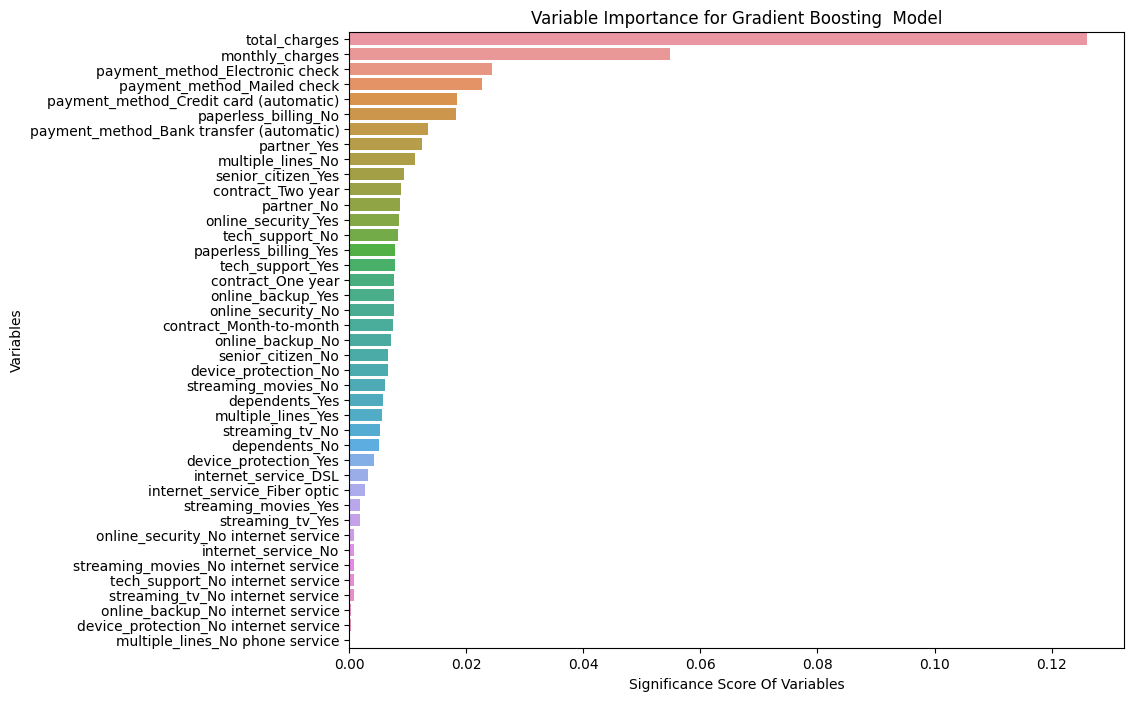

In [9]:
X_train2 = X_train.copy()
y_train2 = y_train.copy()


gb_tuned = gb1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(gb_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8)) 
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Gradient Boosting  Model")
plt.show()


In [8]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
total_charges,0.128293
monthly_charges,0.047772


In [10]:
feature_importances_df.T

,total_charges,monthly_charges,payment_method_Mailed check,payment_method_Electronic check,payment_method_Credit card (automatic),paperless_billing_No,payment_method_Bank transfer (automatic),multiple_lines_No,partner_Yes,partner_No,...,streaming_movies_Yes,internet_service_Fiber optic,tech_support_No internet service,internet_service_No,online_security_No internet service,online_backup_No internet service,device_protection_No internet service,streaming_movies_No internet service,streaming_tv_No internet service,multiple_lines_No phone service
Significance Score,0.128293,0.047772,0.023632,0.022191,0.017857,0.016852,0.01586,0.013293,0.010617,0.010508,...,0.0027,0.002034,0.000799,0.000799,0.000351,0.000351,0.000351,0.000242,0.000048,0.000036


In [11]:
feature_importances_df.T.to_csv('../data/Significant_Score/re_SMOTE_GB_Significance_Score.csv', index=False)

### the classification report

In [12]:
from sklearn.metrics import confusion_matrix


y_pred = gb1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[868, 165],
       [169, 205]])

In [13]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    1037
1     370
Name: count, dtype: int64

In [14]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
0        1033
1         374
Name: count, dtype: int64

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = gb1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.762615
1,Precision,0.554054
2,Recall,0.548128
3,F1-Score,0.551075
4,Kappa,0.389729


In [16]:
metrics_df.to_csv('../data/metrics/re_SMOTE_gb_metrics.csv', index=False)